### Scoprite Kaggle e confrontatevi sulla piattaforma, vi invito ad esplorarla per bene in quanto punto di riferimento per il machine learning e ai moderna

- kaggle.com

- Provare ad analizzare tutti insieme un nuovo set di dati:

- https://www.kaggle.com/competitions/playground-series-s4e10/code

- C’è anche una sezione con I risultati di alcuni utenti e il loro codice, provate a scoprire se ci sono dei passaggi interessati per quanto riguarda l’analisi e aggiungeteli al vostro foglio con le funzioni di analisi

- Sempre prendendo spunto dai risultati di altri utenti provarte a creare un modello di machine learning e a mettere il risultato dell’analisi su kaggle… vi restituirà un punteggio in base al quale verrete posizionati in una classifica sull’argomento

- Inviare un solo file jupyter (rappresentativo della classe) con codice, analisi e commento sempre a mbagnoli999@gmail.com

In [137]:
#Import delle librerie
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [138]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [139]:
df = pd.read_csv('train.csv')


In [140]:
df.info()
df.drop(['id'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [141]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [143]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [144]:
#Dropping duplicates
if df.duplicated().sum():
    df.drop_duplicates(inplace=True)

In [145]:
#Neumerical Columns
num_col = df.select_dtypes(exclude='object').columns
#Categorical Columns
cat_col = df.select_dtypes(include='object').columns
num_col, cat_col

(Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
        'loan_status'],
       dtype='object'),
 Index(['person_home_ownership', 'loan_intent', 'loan_grade',
        'cb_person_default_on_file'],
       dtype='object'))

In [146]:
print(f"Neumerical Columns : {num_col.values.tolist()}\n\n")
print(f"Categorical Columns : {cat_col.values.tolist()}")

Neumerical Columns : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']


Categorical Columns : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


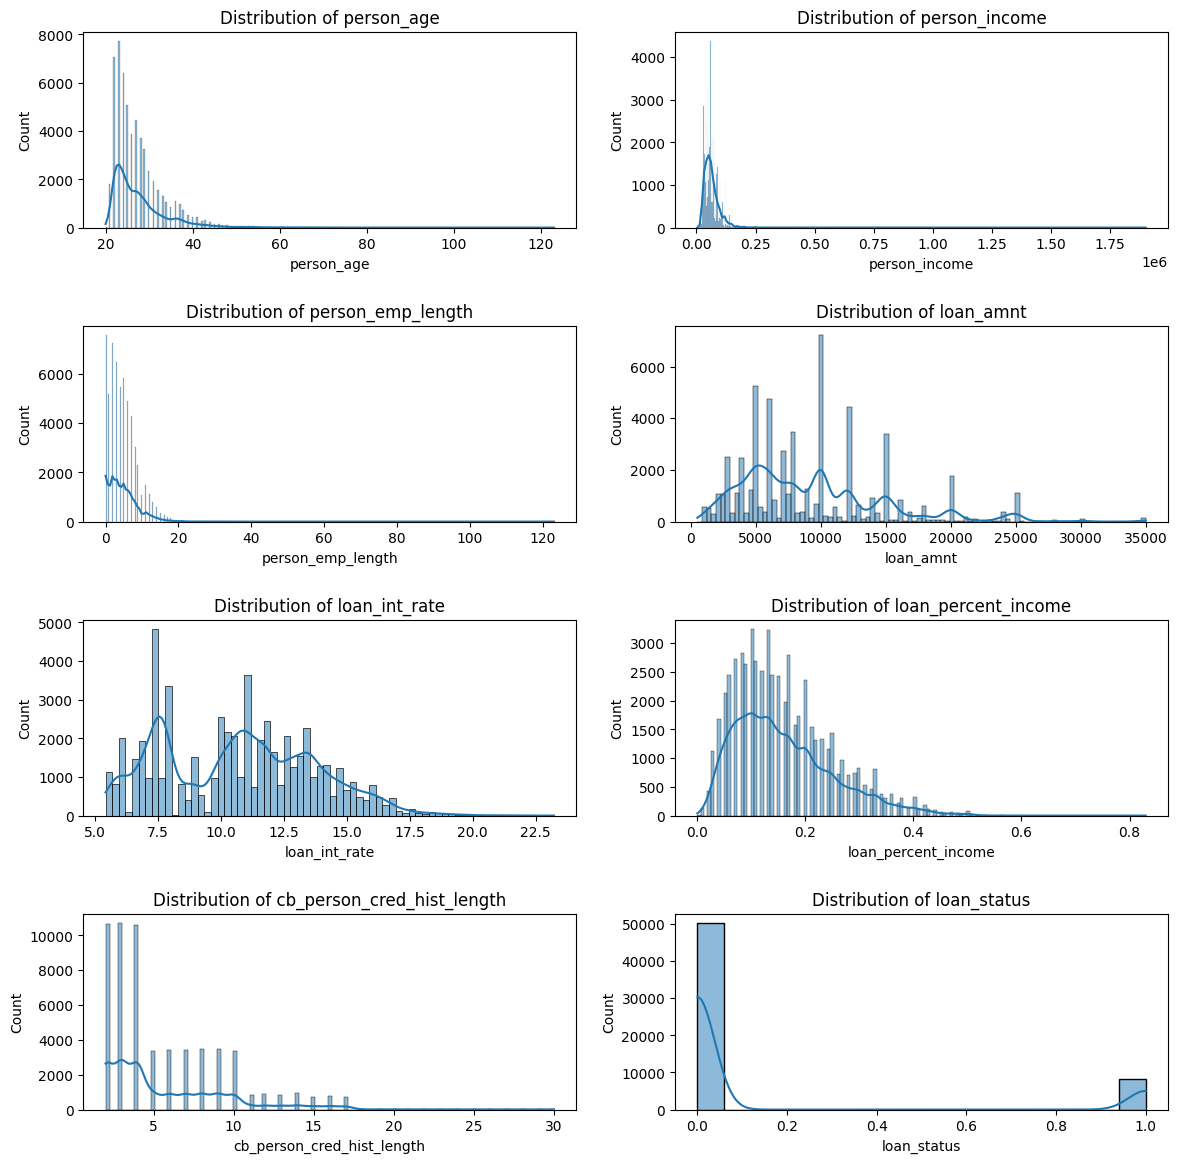

In [147]:
#For neumeric feature
fig,axes = plt.subplots(math.ceil(len(num_col.values)/2),2,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)

#Plot the histogram for all neumeric columns

for idx, col in enumerate(num_col):
    x = idx//2
    y = idx%2
    sns.histplot(df[col],kde=True,ax=axes[x,y])
    axes[x, y].set_title(f'Distribution of {col}')
    axes[x, y].set_xlabel(col)
    axes[x, y].set_ylabel('Count')
plt.show()

- Si può notare che la colonna del loan status sia molto sbilanciata verso chi non riceve il prestito
- Raramente la rata va oltre il 40% delle stipendio, nella maggior parte dei casi si attesta intorno al 15% dello stipendio

In [167]:
# Eleminti unici nelle Series categories
for el in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    print(el, df[el].nunique())

person_home_ownership 4
loan_intent 6
loan_grade 7
cb_person_default_on_file 2


In [149]:
#Proviamo a modificare la funzione di ieri:

def analyze_and_plot_fixed(dataframe, group_col, base_path):
    # Lista per DataFrame filtrati e correlazioni
    filtered_corr_list = []
    
    # Valori unici della colonna
    unique_values = dataframe[group_col].unique()
    
    for value in unique_values:
        # Filtra il DataFrame
        df_filtered = dataframe[dataframe[group_col] == value]
        
        if df_filtered.empty:
            continue  # Salta se il DataFrame è vuoto
        
        # Nome del gruppo
        group_name = str(df_filtered[group_col].iloc[0]).replace("/", "-")  # Gestione di caratteri speciali
        
        # Rimuovi le colonne non necessarie
        df_cleaned = df_filtered.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1, errors='ignore')
        
        # Calcola la matrice di correlazione
        corr_matrix = df_cleaned.corr()
        
        # Filtra correlazioni significative
        filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3)) & (corr_matrix != 1)).stack()
        filtered_corr_list.append((f'{group_col} name: {group_name}\n', filtered))
        
        # Crea la directory per salvare le immagini
        save_path = os.path.join(base_path, group_col)
        os.makedirs(save_path, exist_ok=True)
        
        # Plotta la heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {group_col}: {group_name}')
        
        # Salva il grafico
        plt.savefig(f'{save_path}/{group_name}_heatmap.png', bbox_inches='tight')
        plt.close()  # Chiudi il grafico per evitare conflitti
        
    return filtered_corr_list


base_path = './image'
filtered_corr_home_own = analyze_and_plot_fixed(df, 'person_home_ownership', base_path)
filtered_corr_loan_intent = analyze_and_plot_fixed(df, 'loan_intent', base_path)
#['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
filtered_corr_loan_grade = analyze_and_plot_fixed(df, 'loan_grade', base_path)
filtered_corr_cb_default = analyze_and_plot_fixed(df, 'cb_person_default_on_file', base_path)

In [150]:
corr_filtrate = [filtered_corr_home_own, filtered_corr_loan_intent, filtered_corr_loan_grade, filtered_corr_cb_default]
for el in corr_filtrate:
    display(el)

[('person_home_ownership name: RENT\n',
  person_age                  cb_person_cred_hist_length    0.880210
  person_income               loan_amnt                     0.323939
  loan_amnt                   person_income                 0.323939
                              loan_percent_income           0.682919
  loan_int_rate               loan_status                   0.335683
  loan_percent_income         loan_amnt                     0.682919
                              loan_status                   0.478472
  cb_person_cred_hist_length  person_age                    0.880210
  loan_status                 loan_int_rate                 0.335683
                              loan_percent_income           0.478472
  dtype: float64),
 ('person_home_ownership name: OWN\n',
  person_age                  cb_person_cred_hist_length    0.876507
  person_income               loan_amnt                     0.327054
  loan_amnt                   person_income                 0.327054
     

[('loan_intent name: EDUCATION\n',
  person_age                  cb_person_cred_hist_length    0.871835
  loan_amnt                   loan_percent_income           0.666378
  loan_percent_income         loan_amnt                     0.666378
                              loan_status                   0.391602
  cb_person_cred_hist_length  person_age                    0.871835
  loan_status                 loan_percent_income           0.391602
  dtype: float64),
 ('loan_intent name: MEDICAL\n',
  person_age                  cb_person_cred_hist_length    0.864460
  person_income               loan_amnt                     0.345332
  loan_amnt                   person_income                 0.345332
                              loan_percent_income           0.635994
  loan_int_rate               loan_status                   0.425486
  loan_percent_income         loan_amnt                     0.635994
                              loan_status                   0.386196
  cb_person_cred

[('loan_grade name: B\n',
  person_age                  cb_person_cred_hist_length    0.867246
  person_income               loan_amnt                     0.345566
  loan_amnt                   person_income                 0.345566
                              loan_percent_income           0.645358
  loan_percent_income         loan_amnt                     0.645358
                              loan_status                   0.425778
  cb_person_cred_hist_length  person_age                    0.867246
  loan_status                 loan_percent_income           0.425778
  dtype: float64),
 ('loan_grade name: C\n',
  person_age                  cb_person_cred_hist_length    0.881290
  person_income               loan_amnt                     0.332421
  loan_amnt                   person_income                 0.332421
                              loan_percent_income           0.637176
  loan_percent_income         loan_amnt                     0.637176
                              lo

[('cb_person_default_on_file name: N\n',
  person_age                  cb_person_cred_hist_length    0.872540
  person_income               loan_amnt                     0.308694
  loan_amnt                   person_income                 0.308694
                              loan_percent_income           0.645385
  loan_percent_income         loan_amnt                     0.645385
                              loan_status                   0.394581
  cb_person_cred_hist_length  person_age                    0.872540
  loan_status                 loan_percent_income           0.394581
  dtype: float64),
 ('cb_person_default_on_file name: Y\n',
  person_age                  cb_person_cred_hist_length    0.883738
  person_income               loan_amnt                     0.330058
  loan_amnt                   person_income                 0.330058
                              loan_percent_income           0.656406
  loan_int_rate               loan_status                   0.357793
  

In [151]:

def corr_comuni(filtered_corr_list,nome_lista):

    correlation_dict = {}

    for group_info, filtered_corr in filtered_corr_list:
        group_name = group_info.strip()
        for (col1, col2), value in filtered_corr.items():
            pair = tuple(sorted([col1, col2]))
            correlation_dict.setdefault(pair, set()).add(group_name)

    #Filtra le coppie presenti in almeno 2 elementi unici della colonna
    relevant_correlations = {pair: names for pair, names in correlation_dict.items() if len(names) >= 2}

    #Stampa i risultati
    print(f"Correlazioni presenti in 2 o più {nome_lista}:")
    for pair, names in relevant_correlations.items():
        print(f"{pair}: presenti in {len(names)} {nome_lista} -> {', '.join(names)}")

    return relevant_correlations

#['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
#[filtered_corr_home_own, filtered_corr_loan_intent, filtered_corr_loan_grade, filtered_corr_cb_default]

relevant_correlations_status = corr_comuni(filtered_corr_home_own,"person_home_ownership")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_loan_intent, "loan_intent")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_loan_grade, "loan_grade")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_cb_default, "cb_person_default_on_file")

Correlazioni presenti in 2 o più person_home_ownership:
('cb_person_cred_hist_length', 'person_age'): presenti in 4 person_home_ownership -> person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OTHER, person_home_ownership name: OWN
('loan_amnt', 'person_income'): presenti in 3 person_home_ownership -> person_home_ownership name: RENT, person_home_ownership name: OTHER, person_home_ownership name: OWN
('loan_amnt', 'loan_percent_income'): presenti in 4 person_home_ownership -> person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OTHER, person_home_ownership name: OWN
('loan_int_rate', 'loan_status'): presenti in 3 person_home_ownership -> person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OTHER
('loan_percent_income', 'loan_status'): presenti in 2 person_home_ownership -> person_home_ownership name: RENT, person_home_ownership name: OTHER


----

In [152]:
df['cut_età'] = pd.cut(df['person_age'], bins=[20, 30, 40, 50, 60, 80, 125], labels=['giovanissimo', 'giovane', 'young_adulto', 'adulto','anziano','vecchio'])

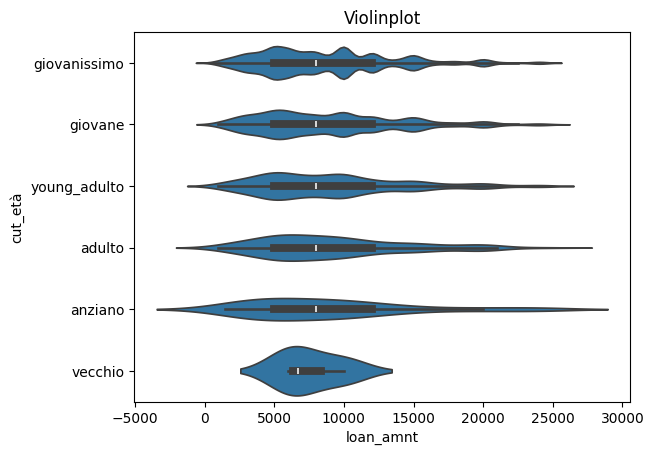

In [153]:
sns.violinplot(data=df[df["loan_amnt"] < 25000], y='cut_età', x='loan_amnt')
plt.title("Violinplot")
plt.show()

- Nella fascia di età (vecchi) questi tendono a fare più prestiti rispetto alle altre fascie d'età ma con importi minori

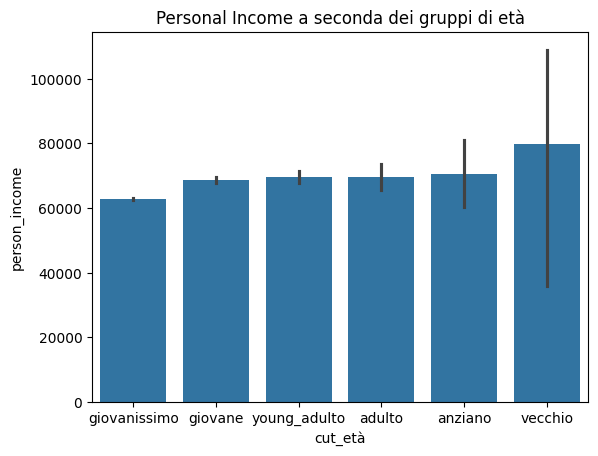

In [154]:
sns.barplot(data=df, x='cut_età', y='person_income')
plt.title('Personal Income a seconda dei gruppi di età')
plt.show()

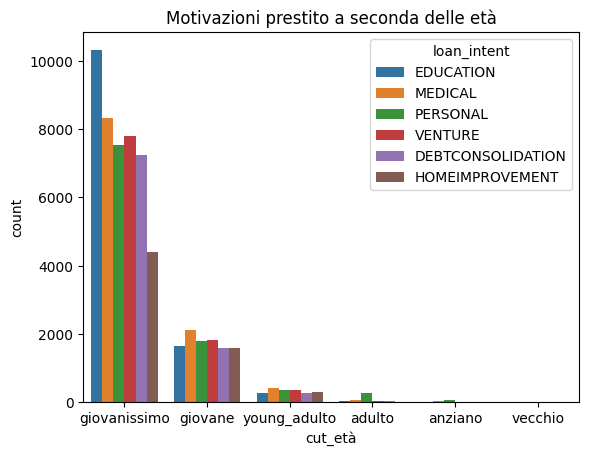

In [155]:
sns.countplot(data=df, x='cut_età', hue='loan_intent')
plt.title('Motivazioni prestito a seconda delle età')
plt.show()

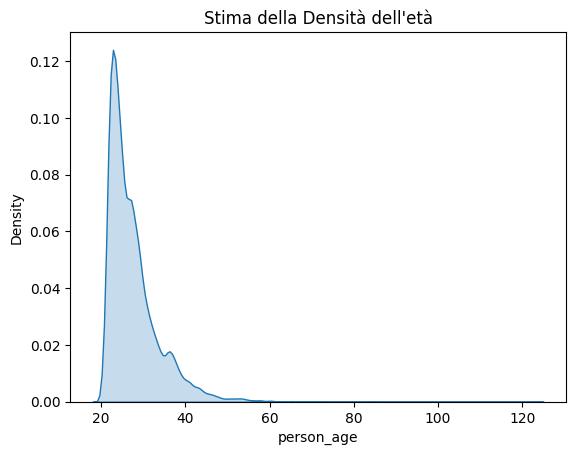

In [156]:
sns.kdeplot(data=df, x='person_age', fill=True)
plt.title("Stima della Densità dell'età")
plt.show()

In [157]:
from fn_heatmap import data_convet_to_heatmap
    
new_df =  data_convet_to_heatmap(df, max_uniq=7, min_corr=0.2)

corr = new_df.corr()

# corr

Converto person_home_ownership aggiungendo 4 colonne, con valore 0 o 1
Converto loan_intent aggiungendo 6 colonne, con valore 0 o 1
Converto loan_grade aggiungendo 7 colonne, con valore 0 o 1
Converto cb_person_default_on_file in 0 o 1
Converto cut_età aggiungendo 6 colonne, con valore 0 o 1
Elimino colonna person_home_ownership-OTHER, min: -0.04071942398250851, max: 0.017546157709698047
Elimino colonna loan_intent-HOMEIMPROVEMENT, min: -0.17813777220113236, max: 0.09637156080904133
Elimino colonna loan_grade-F, min: -0.03767850536852389, max: 0.13195055143248793
Elimino colonna loan_grade-G, min: -0.017714431887468688, max: 0.07545986946146853
Elimino colonna cut_età-vecchio, min: -0.013425189231459148, max: 0.08234513403622447


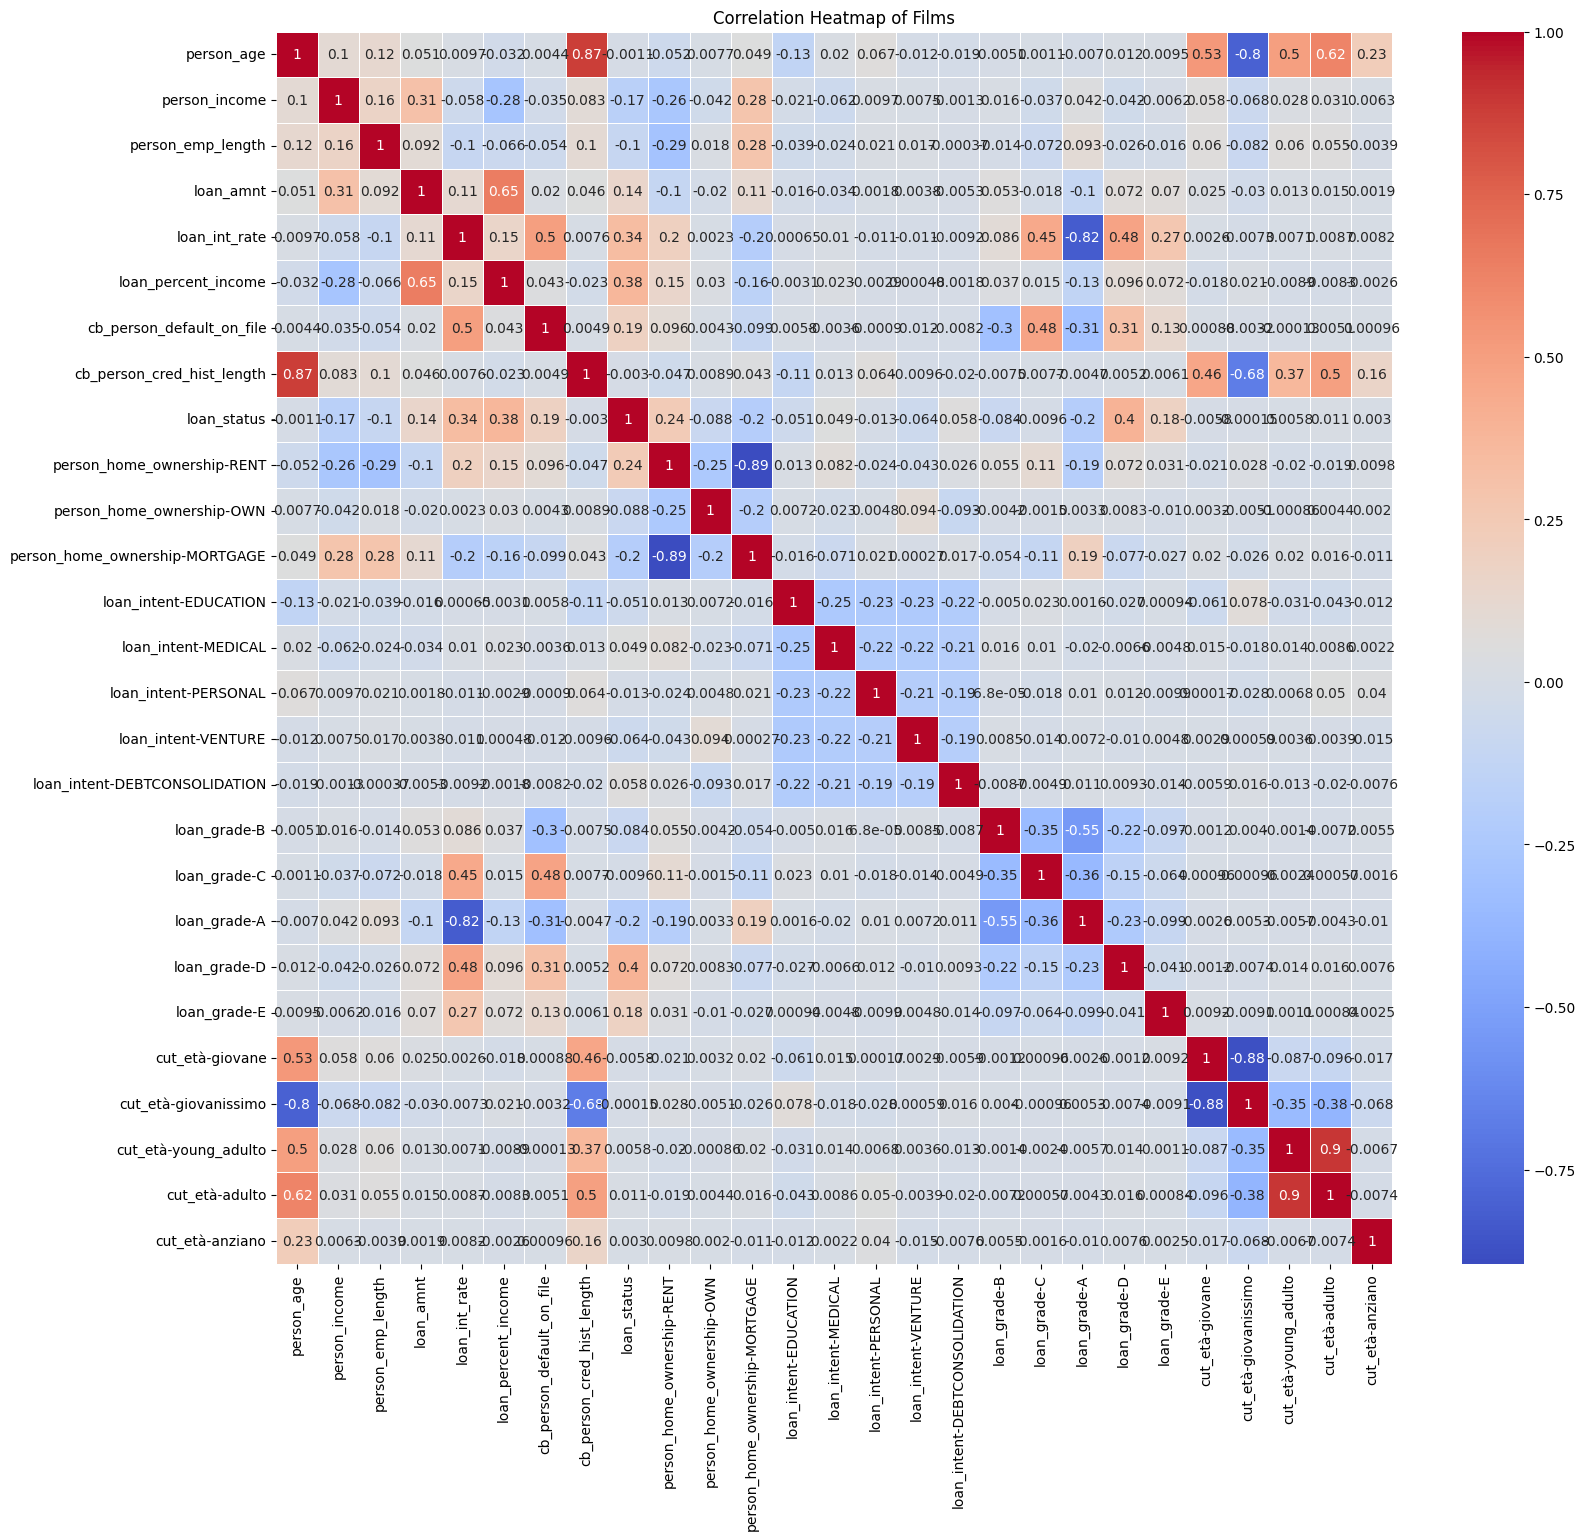

In [158]:
# Plotting Heatmap
plt.figure(figsize=(18,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Heatmap of Films')
plt.show()

### Colonne utili per determinare il loan status
Consideriamo le colonne con una correlazione con questa colonna superiore a +-0.2:
- loan_grade, person_home_ownership, cb_person_default_on_file, loan_amnt, loan_int_rate

In [ ]:
m_age= df['person_age'].median()
std_age= df['person_age'].std()
df = df[df['person_age'] <=m_age+2*std_age]

58645
55225


- Essendo l'età molto sbilanciate elimianmo tutti i dati per le persnone più vecchei di 2 volte la deviazione standard rispetto alla mediana del campione.

In [ ]:
# Proviamo a creare un modello che riesca a predire se a una data persona possa essere idoneo a ricevere il prestito.
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.33, random_state=42)

features = ["loan_grade", "person_home_ownership", "cb_person_default_on_file",'loan_amnt','loan_int_rate']
x = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x, y_train)
predictions = model.predict(X_test)

In [166]:
accuracy=accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.891358024691358
